# Plan 

# Data observation

In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img 
import os
import time
import tensorflow
import shutil
from PIL import Image

In [3]:
DATA_PATH = "../data/huge data/"

In [4]:
df = pd.read_csv(DATA_PATH + "raw data/data.csv")

Adding "PhotoTop" and "PhotoDown" difference column.

In [5]:
top_list = list(df["PhotoTop"])
down_list = list(df["PhotoDown"])
difference = list(np.array(down_list) - np.array(top_list))

In [6]:
df.insert(11, "PhotoDifference", difference)

Shortening some names so later we can add parameters to file names.

In [7]:
df = df.replace({"с карбонатными обломками или конкрециями": "с карб. обломками или конкрециями", "пересл. кремнисто-глинистой породы и аргиллита": "пересл. кремн.-глинист. породы и аргиллитa", "пересл. песчаника и глины аргиллитоподобной" : "пересл. песчаника и глины аргиллитоподобн."})

In [8]:
display(df.head())

,Folder,Id,Field,Well,CoringTop,CoringDown,CoringTopBind,CoringDownBind,CoreRecovery,PhotoTop,PhotoDown,PhotoDifference,PhotoType,LayerTop,LayerDown,Rock,Carbonate,Ruin,Saturation
0,Unload1,1000000,Field6,Well11,1957.1,1963.1,1958.3,1964.3,5.93,0.00,1.00,1.00,ДС,0.00,1.45,песчаник,не карбонатный,не разрушен,нефтенасыщенные
1,Unload1,1000001,Field6,Well11,1957.1,1963.1,1958.3,1964.3,5.93,0.00,1.00,1.00,УФ,0.00,1.45,песчаник,не карбонатный,не разрушен,нефтенасыщенные
2,Unload1,1000002,Field6,Well11,1957.1,1963.1,1958.3,1964.3,5.93,1.00,1.45,0.45,ДС,0.00,1.45,песчаник,не карбонатный,не разрушен,нефтенасыщенные
3,Unload1,1000003,Field6,Well11,1957.1,1963.1,1958.3,1964.3,5.93,1.00,1.45,0.45,УФ,0.00,1.45,песчаник,не карбонатный,не разрушен,нефтенасыщенные
4,Unload1,1000004,Field6,Well11,1957.1,1963.1,1958.3,1964.3,5.93,1.45,2.00,0.55,ДС,1.45,3.54,алевролит,не карбонатный,не разрушен,не опред.


In [9]:
display(df.shape)

(6414, 19)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6414 entries, 0 to 6413
Data columns (total 19 columns):
Folder             6414 non-null object
Id                 6414 non-null int64
Field              6414 non-null object
Well               6414 non-null object
CoringTop          6414 non-null float64
CoringDown         6414 non-null float64
CoringTopBind      6414 non-null float64
CoringDownBind     6414 non-null float64
CoreRecovery       6414 non-null float64
PhotoTop           6414 non-null float64
PhotoDown          6414 non-null float64
PhotoDifference    6414 non-null float64
PhotoType          6414 non-null object
LayerTop           6414 non-null float64
LayerDown          6414 non-null float64
Rock               6414 non-null object
Carbonate          6414 non-null object
Ruin               6414 non-null object
Saturation         6414 non-null object
dtypes: float64(10), int64(1), object(8)
memory usage: 952.2+ KB


In [11]:
display(df.describe())

,Id,CoringTop,CoringDown,CoringTopBind,CoringDownBind,CoreRecovery,PhotoTop,PhotoDown,PhotoDifference,LayerTop,LayerDown
count,6.414000e+03,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000
mean,1.002138e+06,2550.285678,2563.308544,2460.439529,2473.149953,12.740711,6.085538,6.706851,0.621313,4.798422,7.968268
std,1.464913e+03,640.279915,641.503499,787.696835,790.103011,4.120460,4.357954,4.363185,0.346909,4.342573,4.762334
min,1.000000e+06,784.000000,791.000000,0.000000,0.000000,0.840000,0.000000,0.110000,0.010000,0.000000,0.110000
25%,1.000858e+06,2401.000000,2419.000000,2319.800000,2332.800000,9.000000,2.490000,3.000000,0.300000,0.790000,4.120000
50%,1.001792e+06,2747.000000,2763.000000,2742.600000,2760.600000,11.980000,5.340000,5.980000,0.640000,3.860000,7.300000
75%,1.003398e+06,2914.000000,2926.000000,2916.600000,2928.600000,17.000000,8.967500,9.650000,0.990000,7.590000,11.197500
max,1.005005e+06,3495.000000,3500.000000,3495.000000,3500.000000,18.150000,17.920000,18.150000,1.050000,17.920000,18.150000


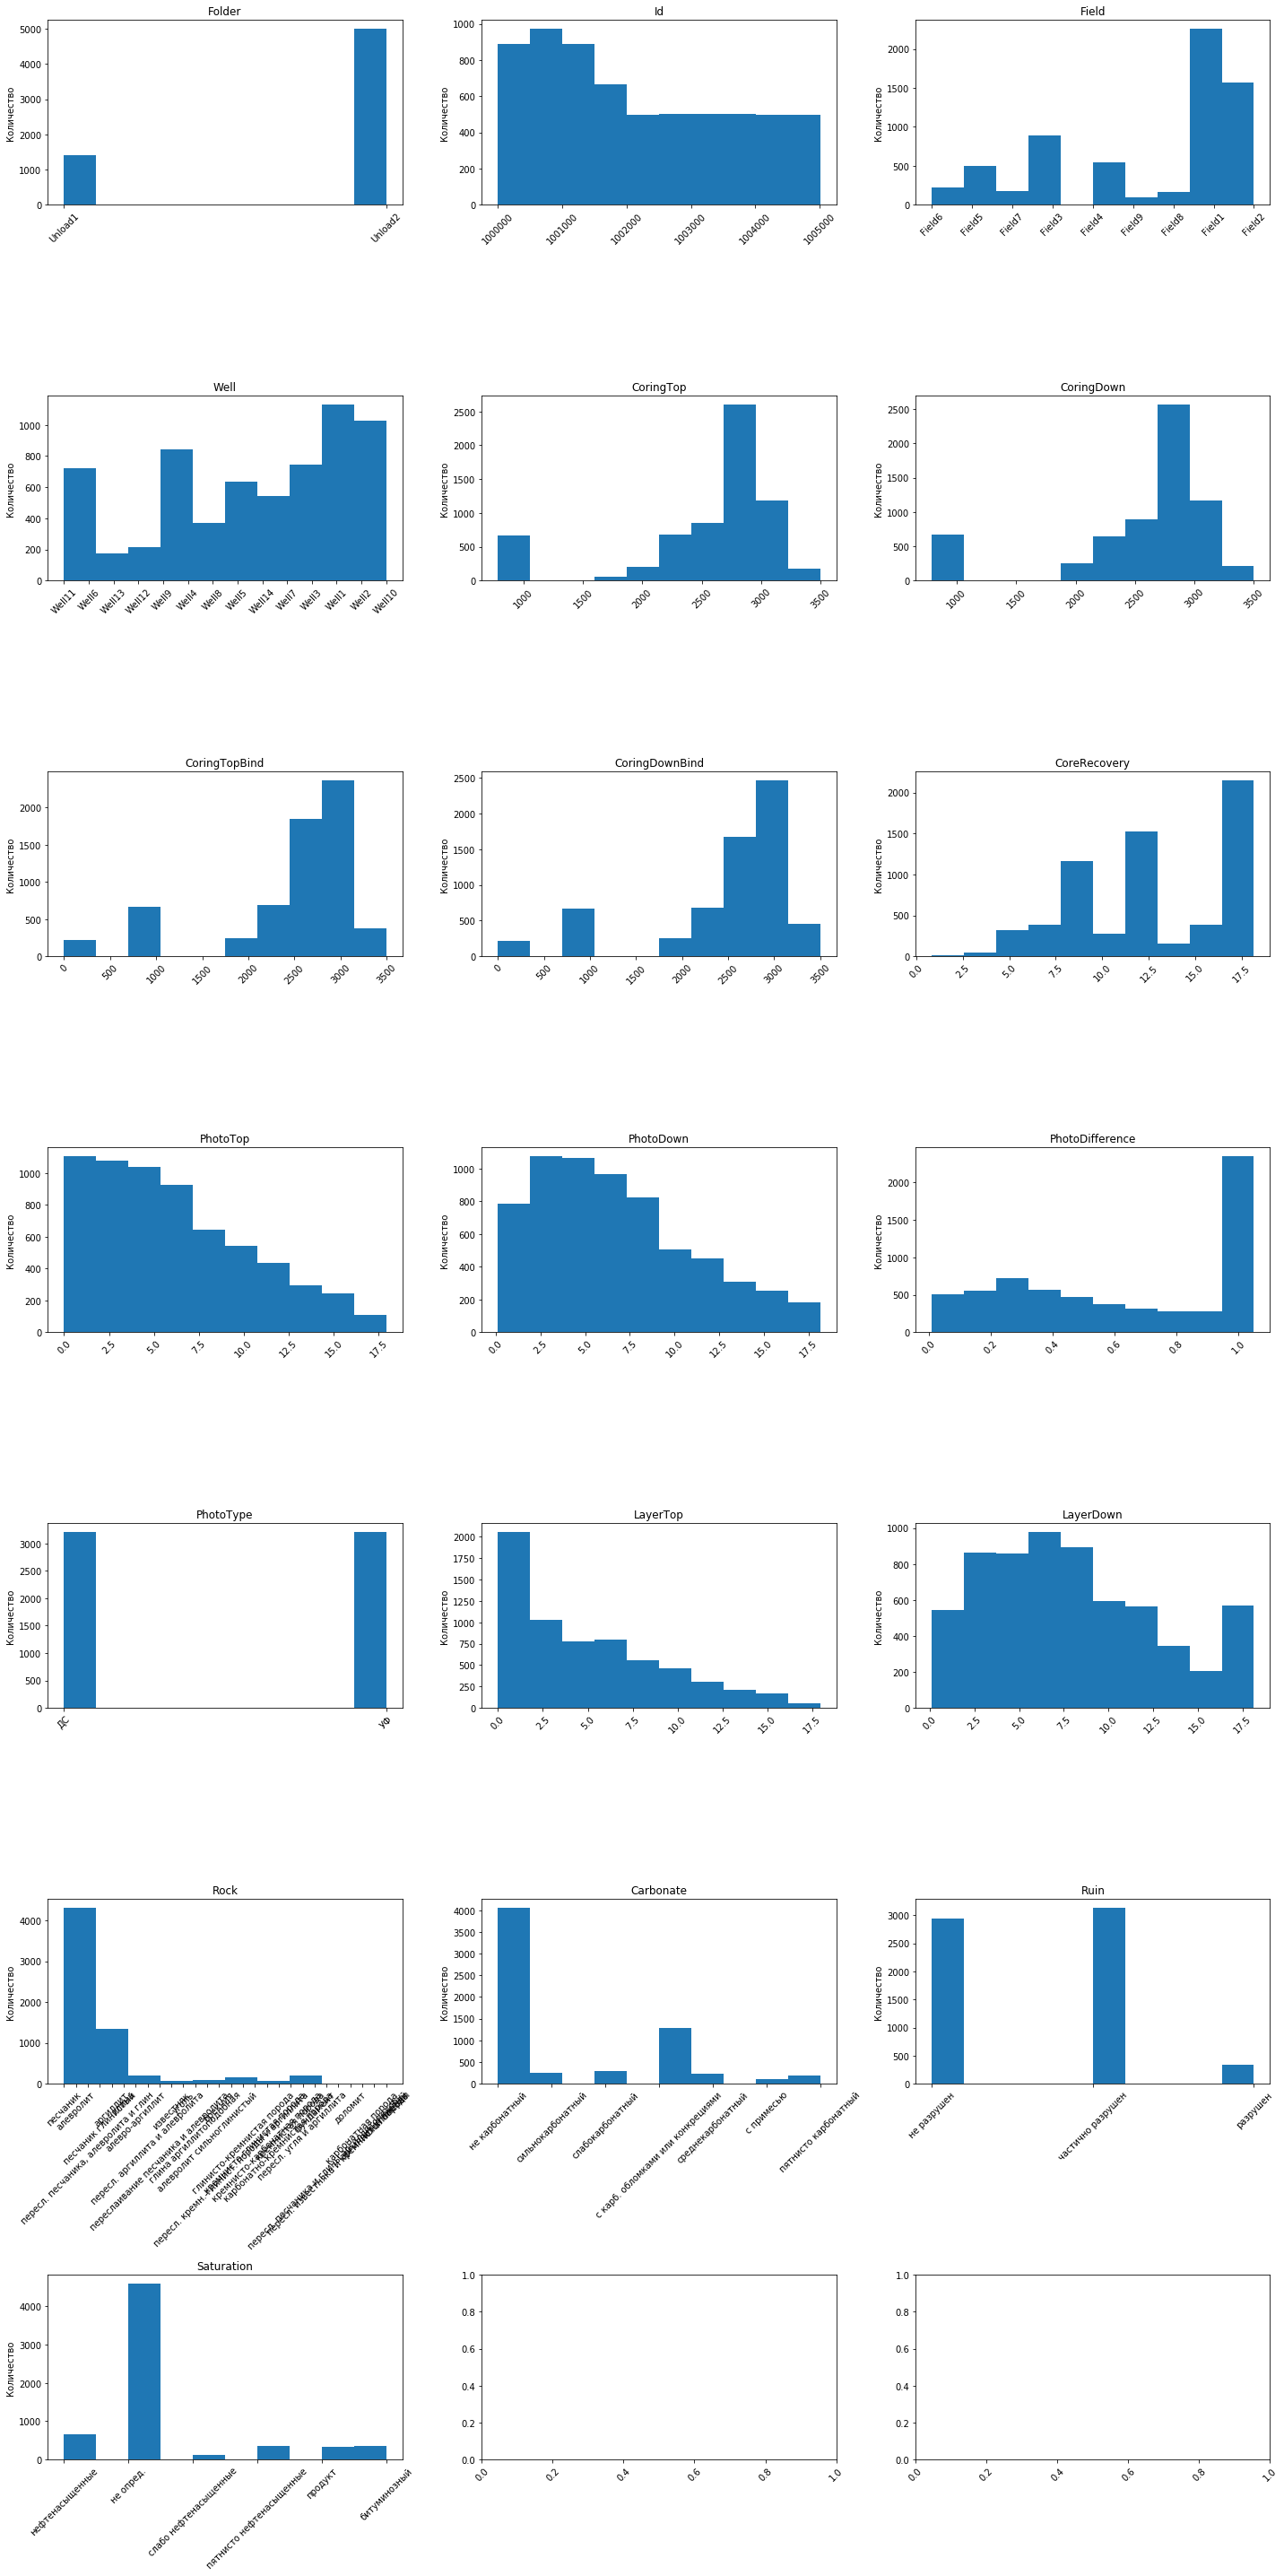

In [12]:
y_len = 7       # Number of plots on y axe.
x_len = 3         # Number of plots on x axe.
cur_column = 0     # Columns iterator.
columns = list(df.columns)

fig, axs = plt.subplots(y_len, x_len, figsize = (20,40))


for i in range(y_len):
    for j in range(x_len):
        if (cur_column > (len(columns)-1)):
            break
        axs[i, j].hist(df[columns[cur_column]])
        axs[i, j].set_title(columns[cur_column]) 
        axs[i, j].set_ylabel("Количество") 
        cur_column += 1

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [13]:
display(df["Rock"].value_counts())

песчаник                                      2482
аргиллит                                      1220
алевролит                                     1138
пересл. песчаника, алевролита и глин           686
кремнистая порода                              156
переслаивание песчаника и алевролита           140
песчаник глинистый                             112
глинисто-кремнистая порода                      78
кремнисто-глинистая порода                      64
глина аргиллитоподобная                         62
карбонатно-кремнистая порода                    56
уголь                                           42
пересл. аргиллита и алевролита                  36
фундамент                                       32
алевролит сильноглинистый                       24
алевро-аргиллит                                 18
известняк                                       16
кремнисто-карбонатная порода                    12
пересл. песчаника и глины аргиллитоподобн.       8
пересл. угля и аргиллита       

In [14]:
display(df["Carbonate"].value_counts())

не карбонатный                       4056
с карб. обломками или конкрециями    1292
слабокарбонатный                      298
сильнокарбонатный                     246
среднекарбонатный                     226
пятнисто карбонатный                  196
с примесью                            100
Name: Carbonate, dtype: int64

In [15]:
display(df["Ruin"].value_counts())

частично разрушен    3132
не разрушен          2944
разрушен              338
Name: Ruin, dtype: int64

In [16]:
display(df["Saturation"].value_counts())

не опред.                   4596
нефтенасыщенные              668
пятнисто нефтенасыщенные     358
битуминозный                 350
продукт                      326
слабо нефтенасыщенные        116
Name: Saturation, dtype: int64

#  Training

## Common parts

Supporting code for visualizing several samples.

In [17]:
# Display images one under another.
def display_image_list(image_list):
    y_len = len(image_list)   # Number of plots on y axe.
    cur_column = 0     # Columns iterator.

    fig, ax = plt.subplots(y_len, figsize = (2,10))

    for i in range(len(ads)):
        im = image_list[i] 
        ax[i].imshow(im)
        ax[i].axis('off')
        cur_column += 1

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

Code for data preparation.

In [18]:
# Gets image path, pattern size and image length.
# Returns an array of cutted images.
def cut_image_into_list(path, patter_height_m=0.2, photo_height_m=1.1):
    
    image = Image.open(path)
    w, h = image.size
    number_of_images = int(photo_height_m // patter_height_m)
    
    pixels_per_image = (patter_height_m * h) // photo_height_m
    
    image_list = []
    for i in range(number_of_images):
        image = Image.open(path)
        image = image.crop((0, i * pixels_per_image, w, (i + 1) * pixels_per_image))
        image_list.append(image)
        
    return image_list

# Saves images list.
def save_image_array(path, image_list, unload, number, top, UV, rock, carbonate, ruin, saturation, patter_height_m):
    for i in range(len(image_list)):
        image_list[i].save(path + UV +"/{}@{}@{}@{}@{}@{}@{}@{}@{}.jpg".format(unload, 
                                                                               number, 
                                                                               format((top + (i * patter_height_m)), '.1f'), 
                                                                               format((top + ((i + 1) * patter_height_m)), '.1f'), 
                                                                               UV, 
                                                                               rock, 
                                                                               carbonate, 
                                                                               ruin, 
                                                                               saturation))

# Cutting all photos and saving them.
# path_to_save should lead to folder with 2 folders: "ДС" and "УФ".
def prepare_photos(dataframe, path_to_save, patter_height_m):
    for i in range(len(dataframe)):
        params = list(dataframe.iloc[i,:])
        image_list = cut_image_into_list(path=DATA_PATH + "raw data/" + params[0] + "/data/" + str(params[1]) + ".jpeg", 
                                         patter_height_m=patter_height_m, 
                                         photo_height_m=params[11])
        save_image_array(path=path_to_save, 
                         image_list=image_list, 
                         unload=params[0], 
                         number=params[1], 
                         top=params[9], 
                         UV=params[12], 
                         rock=params[15], 
                         carbonate=params[16], 
                         ruin=params[17], 
                         saturation=params[18], 
                         patter_height_m=0.2)
    return "done"

Code for data retrieval.

In [135]:
# Makes dataframe out of picture names.
# pictures_path --- path to folder that contains 2 folders: UV and non-UV.
def create_df_from_picture_names(pictures_path):   
    
    # Getting names of UV and non-UV folder.
    folders = os.listdir(pictures_path)
    
    # Filling list with photo names.
    photo_list = []
    for folder in folders:
        photo_list.extend(os.listdir(pictures_path + folder))
    photo_list.sort()    
    
        
    # Getting the columns for our dataframe.
    columns = [df.columns[0], df.columns[1], df.columns[9], df.columns[10], df.columns[12], 
               df.columns[15], df.columns[16], df.columns[17], df.columns[18]]
    pictures_df = pd.DataFrame(columns=columns)
    
    # Iterating throw all photo's names and adding their params to dataframe.
    for i in range(len(photo_list)):
        photo_params = photo_list[i].split("@")
        photo_params[-1] = photo_params[-1][:-4]
        pictures_df.loc[i] = photo_params
        
    return pictures_df

##  Rock

### Requirements 

What have to be done:
- Rock type with 20cm accuracy
- Interensting rock types: "песчаник", "аргиллит", "алевролит", "переслой"
- Exact "переслой", but for baseline enough "переслой" existance up to 5cm and 2cm
- Rock type between photos.

### Plan 

What we will do now:
- Rock type with 20cm accuracy
- Interensting rock types: "песчаник", "аргиллит", "алевролит", "переслой"
- "переслой" existance up to 5cm

How we will do it:
1. Cut images so their length is 20 cm
2. Compare these methods:
 - Train net only on non-UV pictures
 - Train net only on UV pictures
 - Make some combination of UV and non-UV nets outputs
 - Train net on both UV and non-UV pictures

Maybe there's need in trying data augmentation.

### Solution 

#### Preparing photos 

Making dataset for rock type (20cm length photos).

In [289]:
start = time.time()
prepare_photos(df, DATA_PATH + "prepared data/rock/cut photos/", 0.2)
end = time.time()
print(end - start)

1193.3289120197296


We are interested in "песчаник", "аргиллит", "алевролит", "переслой", so:
- let's match all "переслои" with one "переслой"
- let's drop rows, whick rock type does not match with any of interesting rows.

Connecting "переслои" in filenames.

In [282]:
dict_replace = {"пересл. песчаника, алевролита и глин" : "переслой",
                "переслаивание песчаника и алевролита" : "переслой",
                "пересл. аргиллита и алевролита" : "переслой",
                "пересл. песчаника и глины аргиллитоподобн." : "переслой",
                "пересл. кремн.-глинист. породы и аргиллитa" : "переслой",
                "пересл. угля и аргиллита" : "переслой",
                "пересл. известняка и кремнистой породы" : "переслой"
               }

In [277]:
# Filling list with photo names.
folders = os.listdir(DATA_PATH + "prepared data/rock/cut photos/")
photo_list = []
for folder in folders:
    photo_list.extend(os.listdir(pictures_path + folder))
photo_list.sort()   

# Filling list paths.
paths = []
for picture_name in photo_list:
    UV_folder = "УФ" if "УФ" in picture_name else "ДС"
    paths.append(DATA_PATH + "prepared data/rock/cut photos/" + UV_folder + "/" + picture_name)
    
# Filling target photos names.
target_paths = []
for i in range(len(paths)):
    item = paths[i]
    for word, initial in dict_replace.items():
        item = item.replace(word, initial)
    target_paths.append(item)
    
# Renaming files.
for i in range(len(paths)):
    os.renames(paths[i], target_paths[i])

Making dataframe of what we've got.

In [283]:
pictures_df = create_df_from_picture_names(DATA_PATH + "prepared data/rock/cut photos/")

In [284]:
display(pictures_df.sample(5))
display(pictures_df.head(5))

,Folder,Id,PhotoTop,PhotoDown,PhotoType,Rock,Carbonate,Ruin,Saturation
1699,Unload1,1000852,0.2,0.4,ДС,аргиллит,не карбонатный,частично разрушен,не опред.
14932,Unload2,1004563,4.4,4.6,УФ,алевролит,не карбонатный,частично разрушен,не опред.
5422,Unload2,1000942,9.3,9.5,ДС,алевролит,не карбонатный,частично разрушен,не опред.
1116,Unload1,1000602,5.0,5.2,ДС,переслой,с карб. обломками или конкрециями,не разрушен,не опред.
11490,Unload2,1003092,0.0,0.2,ДС,аргиллит,не карбонатный,частично разрушен,не опред.


,Folder,Id,PhotoTop,PhotoDown,PhotoType,Rock,Carbonate,Ruin,Saturation
0,Unload1,1000000,0.0,0.2,ДС,песчаник,не карбонатный,не разрушен,нефтенасыщенные
1,Unload1,1000000,0.2,0.4,ДС,песчаник,не карбонатный,не разрушен,нефтенасыщенные
2,Unload1,1000000,0.4,0.6,ДС,песчаник,не карбонатный,не разрушен,нефтенасыщенные
3,Unload1,1000000,0.6,0.8,ДС,песчаник,не карбонатный,не разрушен,нефтенасыщенные
4,Unload1,1000001,0.0,0.2,УФ,песчаник,не карбонатный,не разрушен,нефтенасыщенные


Let's take a look on a rock type distribution.

In [285]:
display(pictures_df["Rock"].value_counts())

песчаник                        5648
аргиллит                        3916
алевролит                       2682
переслой                        2066
кремнистая порода                482
песчаник глинистый               222
глинисто-кремнистая порода       202
кремнисто-глинистая порода       198
карбонатно-кремнистая порода     162
фундамент                        122
глина аргиллитоподобная          122
уголь                             60
алевролит сильноглинистый         50
известняк                         24
кремнисто-карбонатная порода      20
алевро-аргиллит                   12
глина                              8
доломит                            4
конгломерат                        4
брекчия                            4
аргиллит углистый                  2
Name: Rock, dtype: int64

Removing external rock types.

In [286]:
pictures_df = pictures_df[(pictures_df.Rock == "песчаник")  | 
                          (pictures_df.Rock == "аргиллит")  | 
                          (pictures_df.Rock == "алевролит") | 
                          (pictures_df.Rock == "переслой")
                         ]

In [287]:
display(pictures_df["Rock"].value_counts())

песчаник     5648
аргиллит     3916
алевролит    2682
переслой     2066
Name: Rock, dtype: int64

#### Putting photos to directories

In [307]:
# Copying files to train/val/test folders with given proportions.
# pictures_path --- path to folder that contains UV and non-UV folder.
# target_path --- path to folder that contains folders UV, non-UV, UV+non-UV. 
# category --- column name.
# proportions --- train/validation/test.
def prepare_train_folders(pictures_df, pictures_path, target_path, category_column, proportions=[0.7, 0.2, 0.1]):
    
    # List of folders that will be created (each folder --- category).
    categories = list(pictures_df[category_column].unique()) 
    
    # Creating folders for each category.
    
    # Making a list of paths where to make dirs.
    paths_where_to_make_category_dirs=[]
    for uv_folder in uv_nonuv_folders:
        for train_folder in test_val_train_folders:
            paths_where_to_make_category_dirs.append(target_path+uv_folder+"/"+train_folder+"/")
    
    # Making dirs.
    for where_to_make_dirs in paths_where_to_make_category_dirs:
        for category_name in categories:
            os.makedirs(where_to_make_dirs+category_name, exist_ok=True)                

    # Shuffling df.
    pictures_df = pictures_df.sample(frac=1).reset_index(drop=True)
    
    # List of datarframes.
    # Each dataframe contains elements only from 1 category.
    list_of_df_category = []
    for category in categories:
        list_of_df_category.append(pictures_df[(pictures_df.Rock == category)])
    
    # Iterating throw all dataframes and putting images into correct folders.
    for i in range(len(list_of_df_category)):
        
        # Number of samples in category.
        length = len(list_of_df_category[i])
        
        # Dataframes for 1 type.
        train_df = list_of_df_category[i].iloc[:int(length*proportions[0]),:]
        validation_df = list_of_df_category[i].iloc[int(length*proportions[0]):int(length*(proportions[0] + proportions[1])),:]
        test_df = list_of_df_category[i].iloc[int(length*(proportions[0] + proportions[1])):,:]
    
        print("'{}' category processing started. \n Train samples: {} \n Validation samples: {} \n Test samples: {}".format(categories[i], len(train_df), len(validation_df), len(test_df)))
    
        # Picture names from dataframes.
        train_pictures_names = []
        validation_pictures_names = [] 
        test_pictures_names = []        
        for a in range(len(train_df)):
            params = list(train_df.iloc[a,:])
            picture_name = '@'.join(map(str, params)) + ".jpg" 
            train_pictures_names.append(picture_name)
            
        for b in range(len(validation_df)):
            params = list(validation_df.iloc[b,:])
            picture_name = '@'.join(map(str, params)) + ".jpg" 
            validation_pictures_names.append(picture_name)
            
        for c in range(len(test_df)):
            params = list(test_df.iloc[c,:])
            picture_name = '@'.join(map(str, params)) + ".jpg" 
            test_pictures_names.append(picture_name)            
                
        # Picture paths.
        train_pictures_paths = []
        validation_pictures_paths = [] 
        test_pictures_paths = []        
        
        
        for picture_name in train_pictures_names:
            UV_folder = "УФ" if "УФ" in picture_name else "ДС"
            train_pictures_paths.append(pictures_path + UV_folder + "/" + picture_name)

        for picture_name in validation_pictures_names:
            UV_folder = "УФ" if "УФ" in picture_name else "ДС"
            validation_pictures_paths.append(pictures_path + UV_folder + "/" + picture_name)
            
        for picture_name in test_pictures_names:
            UV_folder = "УФ" if "УФ" in picture_name else "ДС"
            test_pictures_paths.append(pictures_path + UV_folder + "/" + picture_name)            
        
        # Copying pictures.
        for picture_path in train_pictures_paths:
            UV_folder = "UV" if "УФ" in picture_path else "non-UV"
            copy_dir = target_path + UV_folder + "/" + "train/" + categories[i] + "/"
            shutil.copy(picture_path, copy_dir)
            
        for picture_path in validation_pictures_paths:
            UV_folder = "UV" if "УФ" in picture_path else "non-UV"
            copy_dir = target_path + UV_folder + "/" + "validation/" + categories[i] + "/"
            shutil.copy(picture_path, copy_dir)
            
        for picture_path in test_pictures_paths:
            UV_folder = "UV" if "УФ" in picture_path else "non-UV"
            copy_dir = target_path + UV_folder + "/" + "test/" + categories[i] + "/"
            shutil.copy(picture_path, copy_dir)            
            
        print("Done copying all photos from category {}".format(categories[i]))
        
    
    # Iterate throw dataframe an put into correct folder
    # Put in both folders - UV/non-UV and UV+nonUV
    
    return

In [308]:
pictures_path = DATA_PATH + "prepared data/rock/cut photos/"
target_path = DATA_PATH + "prepared data/rock/training data/"
category_column = "Rock"

In [309]:
prepare_train_folders(pictures_df=pictures_df, 
                      pictures_path=pictures_path, 
                      target_path=target_path, 
                      category_column=category_column)

'песчаник' category processing started. 
 Train samples: 3953 
 Validation samples: 1130 
 Test samples: 565


KeyboardInterrupt: 

#### Import samples into keras

### Add later 

What can be done later:
- Rock type between photos.
- Exact "переслой"
- "переслой" range up to 5cm and 2cm

## Carbonate

## Ruin 

## Saturation

# Using model 